# Utilities

In [252]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import sklearn 
import cv2
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


In [212]:
def showImage(image):
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation='nearest')
    plt.axis('off')
    plt.show()

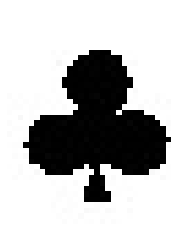

In [213]:

image = cv2.imread("DataSet/trainData/club/2C0.jpg", cv2.IMREAD_COLOR)
showImage(image)

In [ ]:
# Image Augmentation

# Import and split the data

In [214]:
import os
trainData = []
trainLabels = []

dire="DataSet/trainData" 

print(os.listdir(dire))

for innerDir in os.listdir(dire):
    for filename in os.listdir(dire+'/' +innerDir):
        # print(dire+'/' + innerDir +'/' +filename)
        image = cv2.imread(dire+'/' + innerDir +'/' +filename, cv2.COLOR_BGR2GRAY).flatten()/255.0
        trainData.append(image)
        trainLabels.append(innerDir)


print("trainData Size:", len(trainData), "and trainLabels size:", len(trainLabels))



['10', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'club', 'diamond', 'heart', 'J', 'K', 'Q', 'spade']
trainData Size: 4015 and trainLabels size: 4015


In [254]:
from sklearn.model_selection import train_test_split

# split the data
trainData, testData, trainLabels, testLabels = train_test_split(trainData, trainLabels, test_size = 0.01 , random_state=42)


# Data Augmentation

In [ ]:
#  provides a non-parametric transformation to map the data to a uniform distribution with values between 0 and 1:
quantile_transformer = sklearn.preprocessing.QuantileTransformer(random_state=0)
X_train_trans = quantile_transformer.fit_transform(trainData)
X_test_trans = quantile_transformer.transform(testData)

In [255]:
from sklearn.preprocessing import StandardScaler
# fit_transform() is used on the data so that we can scale the data and also learn the scaling parameters of that data.
# It is also known as data normalization.

# Why? to standardize the independent features present in the data in a fixed range. 
# If feature scaling is not done, then a machine learning algorithm tends to weigh greater values,higher 
# and consider smaller values as the lower values, regardless of the unit of the values.

scaler = StandardScaler()
trainData = scaler.fit_transform(trainData)

# Trainning

In [248]:
model_KNN = KNeighborsClassifier(n_neighbors=17, weights='distance',n_jobs=-1) 
model_KNN.fit(trainData, trainLabels)

model_SVC = svm.SVC(kernel='rbf', probability=True)
model_SVC.fit(trainData, trainLabels)

SVC(probability=True)

# Evaluate the model

In [249]:
from sklearn.metrics import accuracy_score

# KNN
Labels_KNN_pred = model_KNN.predict(testData) 
print("KNN Model Accuarcy", accuracy_score(testLabels, Labels_KNN_pred)) # validate the model

KNN Model Accuarcy 1.0


In [250]:
from sklearn.metrics import accuracy_score

# SVM
Labels_SVM_pred = model_SVC.predict(trainData) # test -predict the test trainData-
print("SVM Model Accuarcy", accuracy_score(trainLabels, Labels_SVM_pred)) # validate the model

SVM Model Accuarcy 0.9970149253731343


# Save the model

In [242]:
# from joblib import dump, load
# # save the model
# dump(model_SVC, 'model.joblib') 

# load the model
# model = load('model.joblib')

model = model_KNN

# Random TestCase

In [243]:
import random 
randomIndex = random.randint(0,len(trainLabels))


print("Predicted", trainLabels[randomIndex], "as", model.predict([trainData[randomIndex]]),
    "With confidence", model.predict_proba([trainData[randomIndex]]))



Predicted 4 as ['4'] With confidence [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Test Data

dataSet/testData/0.jpeg
KNN: ['7'] SVM: ['7']


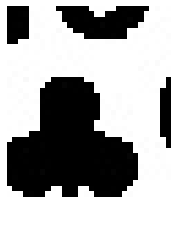

dataSet/testData/1.jpeg
KNN: ['diamond'] SVM: ['7']


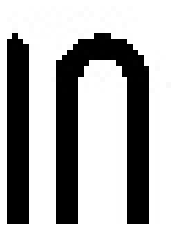

dataSet/testData/10.jpeg
KNN: ['7'] SVM: ['7']


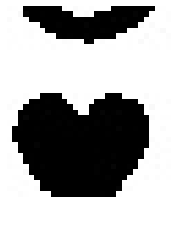

dataSet/testData/11.jpeg
KNN: ['diamond'] SVM: ['7']


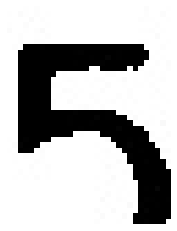

dataSet/testData/12.jpeg
KNN: ['diamond'] SVM: ['9']


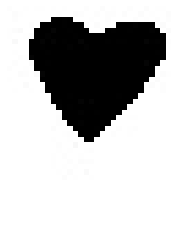

dataSet/testData/13.jpeg
KNN: ['diamond'] SVM: ['diamond']


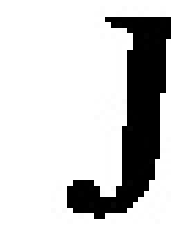

dataSet/testData/14.jpeg
KNN: ['7'] SVM: ['7']


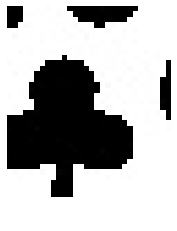

dataSet/testData/15.jpeg
KNN: ['diamond'] SVM: ['7']


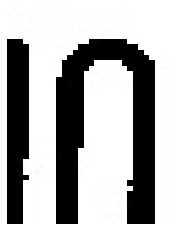

dataSet/testData/16.jpeg
KNN: ['7'] SVM: ['7']


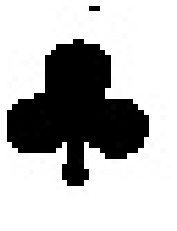

dataSet/testData/17.jpeg
KNN: ['diamond'] SVM: ['diamond']


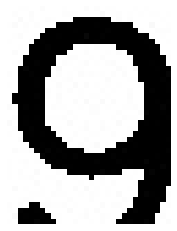

dataSet/testData/18.jpeg
KNN: ['diamond'] SVM: ['6']


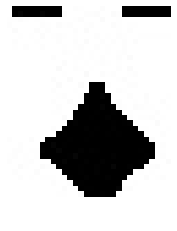

dataSet/testData/19.jpeg
KNN: ['diamond'] SVM: ['7']


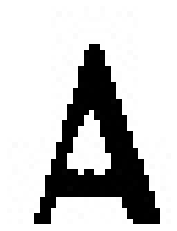

dataSet/testData/2.jpeg
KNN: ['diamond'] SVM: ['4']


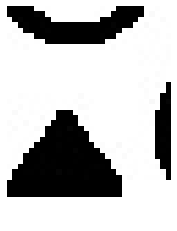

dataSet/testData/20.jpeg
KNN: ['7'] SVM: ['7']


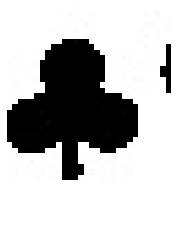

dataSet/testData/21.jpeg
KNN: ['diamond'] SVM: ['diamond']


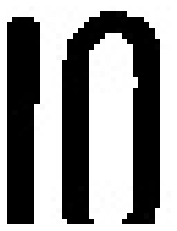

dataSet/testData/22.jpeg
KNN: ['J'] SVM: ['3']


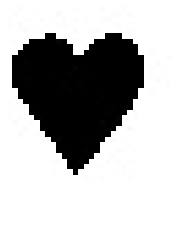

dataSet/testData/23.jpeg
KNN: ['diamond'] SVM: ['4']


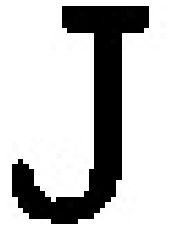

dataSet/testData/24.jpeg
KNN: ['J'] SVM: ['7']


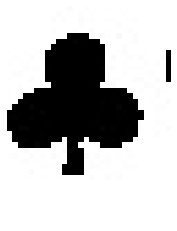

dataSet/testData/25.jpeg
KNN: ['diamond'] SVM: ['diamond']


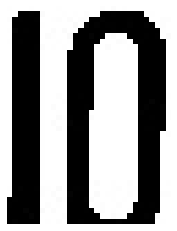

dataSet/testData/26.jpeg
KNN: ['J'] SVM: ['3']


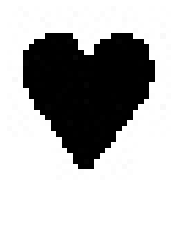

dataSet/testData/27.jpeg
KNN: ['diamond'] SVM: ['diamond']


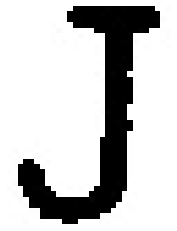

dataSet/testData/3.jpeg
KNN: ['diamond'] SVM: ['7']


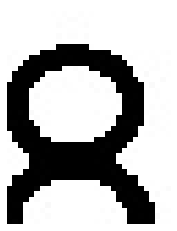

dataSet/testData/30.jpeg
KNN: ['7'] SVM: ['3']


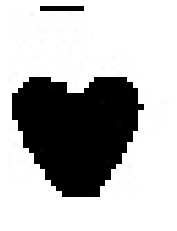

dataSet/testData/31.jpeg
KNN: ['diamond'] SVM: ['9']


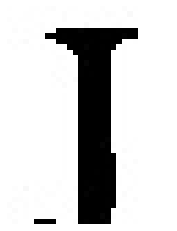

dataSet/testData/32.jpeg
KNN: ['diamond'] SVM: ['4']


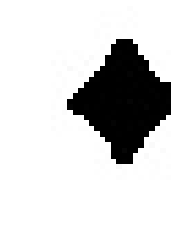

dataSet/testData/33.jpeg
KNN: ['diamond'] SVM: ['4']


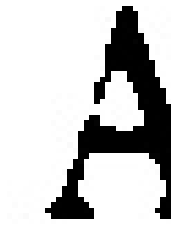

dataSet/testData/34.jpeg
KNN: ['7'] SVM: ['7']


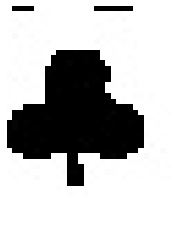

dataSet/testData/35.jpeg
KNN: ['diamond'] SVM: ['diamond']


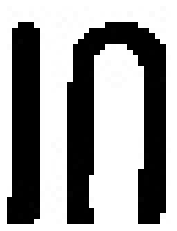

dataSet/testData/36.jpeg
KNN: ['diamond'] SVM: ['6']


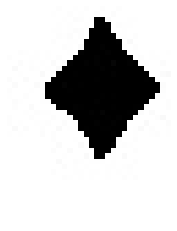

dataSet/testData/37.jpeg
KNN: ['diamond'] SVM: ['4']


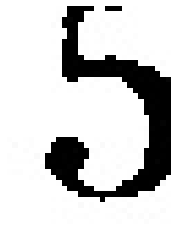

dataSet/testData/38.jpeg
KNN: ['7'] SVM: ['7']


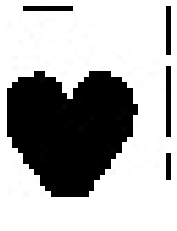

dataSet/testData/39.jpeg
KNN: ['diamond'] SVM: ['9']


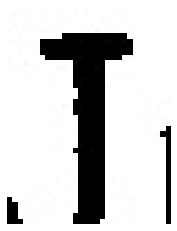

dataSet/testData/4.jpeg
KNN: ['diamond'] SVM: ['3']


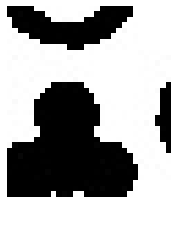

dataSet/testData/40.jpeg
KNN: ['J'] SVM: ['3']


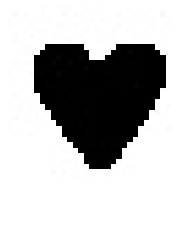

dataSet/testData/41.jpeg
KNN: ['diamond'] SVM: ['7']


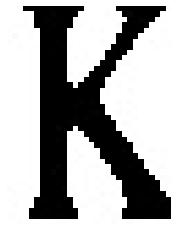

dataSet/testData/42.jpeg
KNN: ['7'] SVM: ['3']


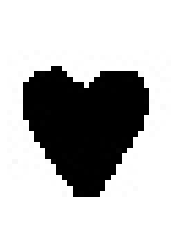

dataSet/testData/43.jpeg
KNN: ['diamond'] SVM: ['6']


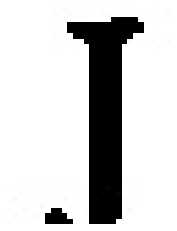

dataSet/testData/44.jpeg
KNN: ['J'] SVM: ['3']


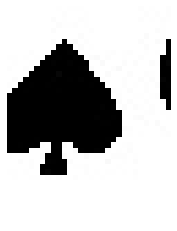

dataSet/testData/45.jpeg
KNN: ['diamond'] SVM: ['7']


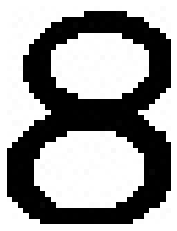

dataSet/testData/46.jpeg
KNN: ['diamond'] SVM: ['3']


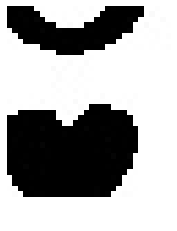

dataSet/testData/47.jpeg
KNN: ['diamond'] SVM: ['7']


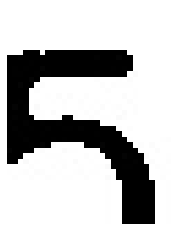

dataSet/testData/48.jpeg
KNN: ['diamond'] SVM: ['4']


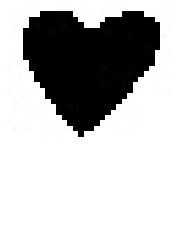

dataSet/testData/49.jpeg
KNN: ['diamond'] SVM: ['diamond']


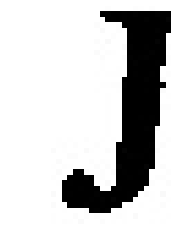

dataSet/testData/5.jpeg
KNN: ['diamond'] SVM: ['7']


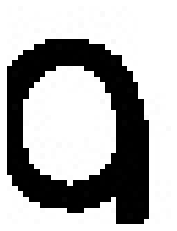

dataSet/testData/50.jpeg
KNN: ['J'] SVM: ['7']


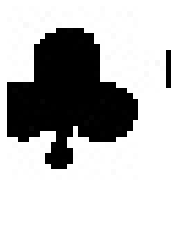

dataSet/testData/51.jpeg
KNN: ['diamond'] SVM: ['diamond']


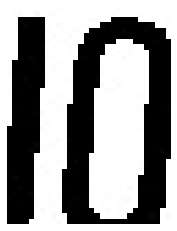

dataSet/testData/52.jpeg
KNN: ['diamond'] SVM: ['diamond']


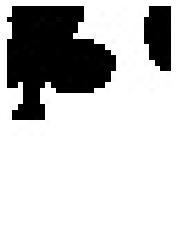

dataSet/testData/53.jpeg
KNN: ['diamond'] SVM: ['4']


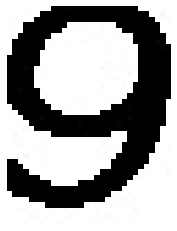

dataSet/testData/54.jpeg
KNN: ['7'] SVM: ['7']


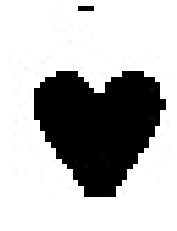

dataSet/testData/55.jpeg
KNN: ['diamond'] SVM: ['diamond']


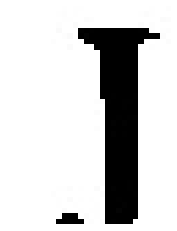

dataSet/testData/56.jpeg
KNN: ['J'] SVM: ['3']


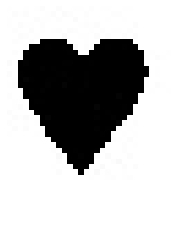

dataSet/testData/57.jpeg
KNN: ['diamond'] SVM: ['diamond']


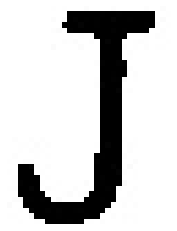

dataSet/testData/58.jpeg
KNN: ['7'] SVM: ['7']


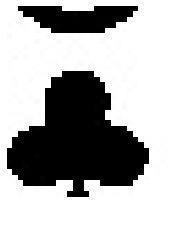

dataSet/testData/59.jpeg
KNN: ['diamond'] SVM: ['diamond']


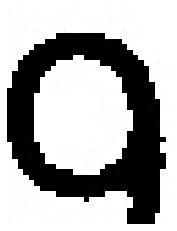

dataSet/testData/6.jpeg
KNN: ['7'] SVM: ['3']


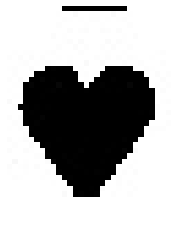

dataSet/testData/60.jpeg
KNN: ['J'] SVM: ['3']


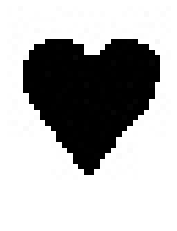

dataSet/testData/61.jpeg
KNN: ['diamond'] SVM: ['7']


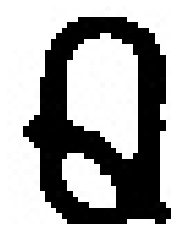

dataSet/testData/62.jpeg
KNN: ['J'] SVM: ['7']


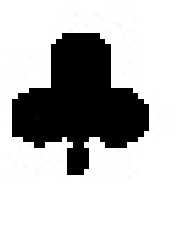

dataSet/testData/63.jpeg
KNN: ['diamond'] SVM: ['diamond']


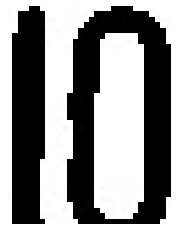

dataSet/testData/64.jpeg
KNN: ['7'] SVM: ['3']


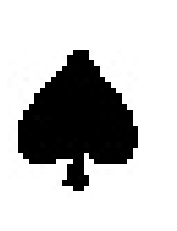

dataSet/testData/65.jpeg
KNN: ['diamond'] SVM: ['3']


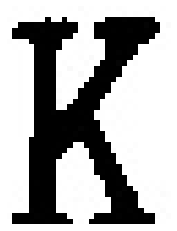

dataSet/testData/7.jpeg
KNN: ['diamond'] SVM: ['diamond']


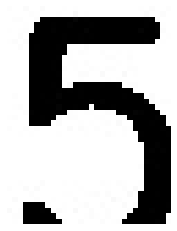

dataSet/testData/8.jpeg
KNN: ['7'] SVM: ['7']


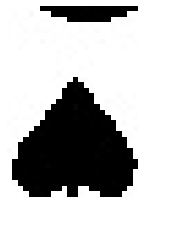

dataSet/testData/9.jpeg
KNN: ['diamond'] SVM: ['7']


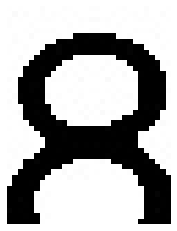

In [244]:
import os

dire="dataSet/testData/"
for filename in os.listdir(dire):
    print(dire+filename)
    image = 1 - cv2.imread(dire+filename, cv2.COLOR_BGR2GRAY)/255.0
    image.resize(40, 30)
    print("KNN:", model_KNN.predict([image.flatten()]), "SVM:", model_SVC.predict([image.flatten()]))
    showImage(image)